# Transmon Qubits and the Deutsch-Jozsa Algorithm

#Qiskit

IBM's Quantum Information Software Kit

In [ ]:
try:
  import qiskit
except ImportError:
  print('Install Qiskit')
  !pip install --quiet qiskit
  !pip install --quiet qiskit[visualization]
  !pip install --quiet git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Install Qiskit
     |████████████████████████████████| 6.5 MB 16.4 MB/s 
     |████████████████████████████████| 18.0 MB 1.3 MB/s 
     |████████████████████████████████| 240 kB 40.1 MB/s 
     |████████████████████████████████| 198 kB 38.7 MB/s 
     |████████████████████████████████| 112 kB 35.1 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 61.3 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
     |████████████████████████████████| 943 kB 54.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 47.9 MB/s 
     |████████████████████████████████| 112 kB 53.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albu

In [ ]:
try:
  import ibm_quantum_widgets
except ImportError:
  !pip install --quiet ibm-quantum-widgets

     |████████████████████████████████| 993 kB 24.4 MB/s 


### Initialize

In [ ]:
%matplotlib inline
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sqrt, sin, cos


#Plot setup
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML


#Qisket imports
from qiskit import *
from qiskit import QuantumCircuit, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel


from qiskit.providers.basicaer import BasicAer
from qiskit.providers.aer.noise import *

from qiskit.quantum_info import Statevector
'''
In Jupyter Notebooks we can display this nicely using Latex.
'''
from qiskit.visualization import array_to_latex

#Connect to IBMQ Services

In [ ]:
from qiskit import IBMQ

IBMQ.save_account('bc66e2531408cdeebd66b109505bebd68d71137abf227f27f609a191d3c3a1b668e5655d7ed3783b5e998a2ae073ffa4ec37aa339a8afb038310594cf6d879e6', overwrite=True)

In [ ]:
# Load our saved IBMQ accounts and list available backends
IBMQ.load_account()


# Our IBM computer will be FakeGuadalupe, which supports 16 qubit operations
from qiskit.test.mock import FakeGuadalupe
device_backend = FakeGuadalupe()

#Simulate the DJ algorithm (constant)
Initialize all variables to be used for the simulation like number of input qubits, bitstring, circuit, etc.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.


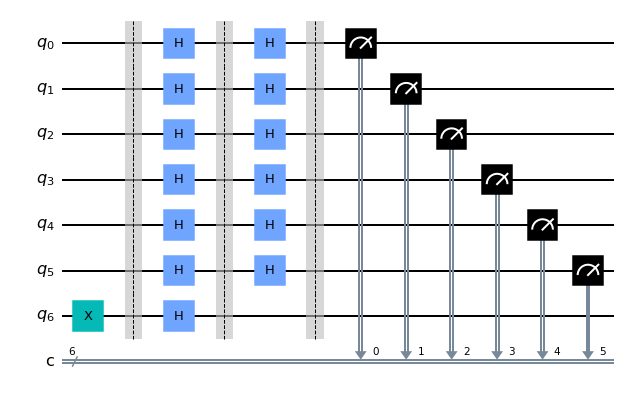

In [ ]:
# Set the size of the input register
n = 6

# working with a contant oracle here (add extra qubit for output register)
const_oracle = QuantumCircuit(n+1) 

# randomly set the output qubit to be 0 or 1 without taking input into account
output = np.random.randint(2)
if output == 1:
  const_oracle.x(n)

'''
Create the Deutsch-Jozsa circuit
'''
dj_circuit = QuantumCircuit(n+1, n)

# Put qubit in state |-> x
dj_circuit.x(n)
dj_circuit.barrier()
dj_circuit.h(n)

# Apply H-gates to bring back from the X basis where the info is in phase
# to Z basis where info is in state (|0⟩ and |1⟩) to be measured
for qubit in range(n):
    dj_circuit.h(qubit)

'''
Add the Constant Oracle to the Deutsch-Jozsa circuit
'''
dj_circuit += const_oracle

# add another barrier for readability
dj_circuit.barrier()

# Repeat H-gates for same reason as stated above
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure the qubit register
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

In [ ]:
# Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, device_backend, optimization_level=3)
job = device_backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


Simulate without noise.

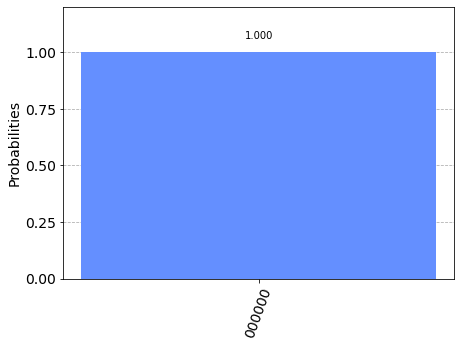

In [ ]:
# Here we run the algorithm (constant) with no noise

backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
#noise_model = None
device = QasmSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
#noise_model = NoiseModel.from_backend(device)
#basis_gates = noise_model.basis_gates

# execute and plot the histogram
result = execute(dj_circuit, backend,
                 coupling_map=coupling_map).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [ ]:
# Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, device_backend, optimization_level=3)
job = device_backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


Simulate with noise.

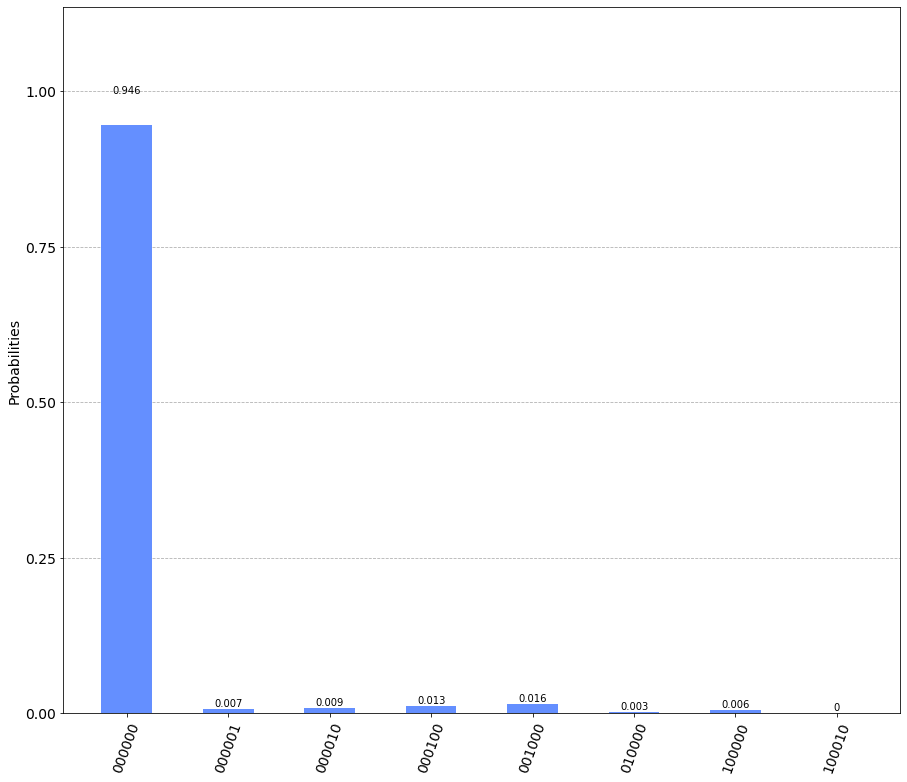

In [ ]:
# Now, let's run the algorithm (constant) with noise that a transom qubit 
# could have

backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
noise_model = None
device = QasmSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

result = execute(dj_circuit, backend,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
plot_histogram(counts, figsize=(15,13))

Results analyzed in slides.

#Simulate the DJ algorithm (Balanced)

Initialize all variables to be used for the simulation like number of input qubits, bitstring, circuit, etc.

101010


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.


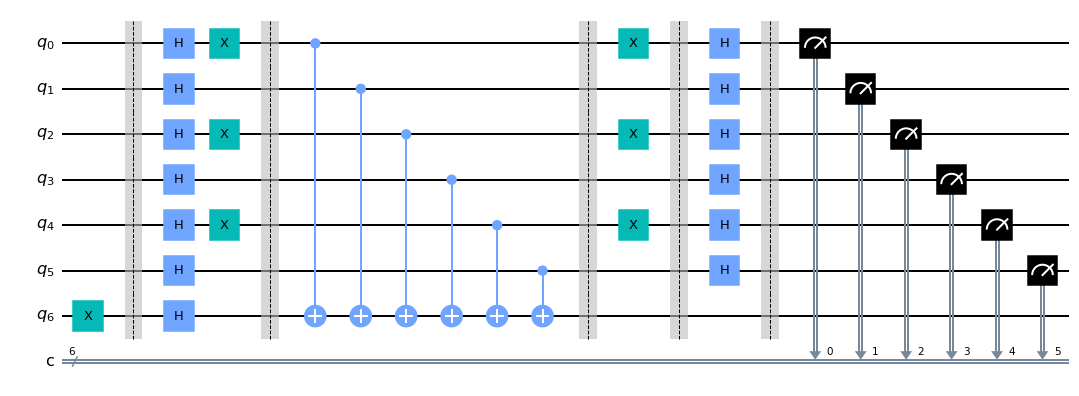

In [ ]:
# set the size of the input regiter
n = 6

# here is our bitstring that will serve as our input into our black box
b = np.random.randint(1,2**n)
bstr = format(b, '0'+str(n)+'b')
print(bstr)

# working with a balanced oracle here (add extra qubit for output register)
balanced_oracle = QuantumCircuit(n+1)

# Place X-gates to vary the input
for qubit in range(len(bstr)):
    if bstr[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider to make circuit easier to read.
balanced_oracle.barrier()

# Controlled-NOT gates create the balanced oracle
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

# another barrier to make the circuit more readable
balanced_oracle.barrier()

# Place X-gates to undo the initial X-gates that were added above
for qubit in range(len(bstr)):
    if bstr[qubit] == '1':
        balanced_oracle.x(qubit)

'''
Create the Deutsch-Jozsa circuit
'''
dj_circuit = QuantumCircuit(n+1, n)

# Put qubit in state |-> x
dj_circuit.x(n)
dj_circuit.barrier()
dj_circuit.h(n)

# Apply H-gates to bring back from the X basis where the info is in phase
# to Z basis where info is in state (|0⟩ and |1⟩) to be measured
for qubit in range(n):
    dj_circuit.h(qubit)

'''
Add the Balanced Oracle to the Deutsch-Jozsa circuit
'''
dj_circuit += balanced_oracle

# add another barrier for readability
dj_circuit.barrier()

# Repeat H-gates for same reason as stated above
for qubit in range(n):
    dj_circuit.h(qubit)

# another barrier for readability
dj_circuit.barrier()

# Measure the qubit register
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')


In [ ]:
# Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, device_backend, optimization_level=3)
job = device_backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


Simulating without noise.

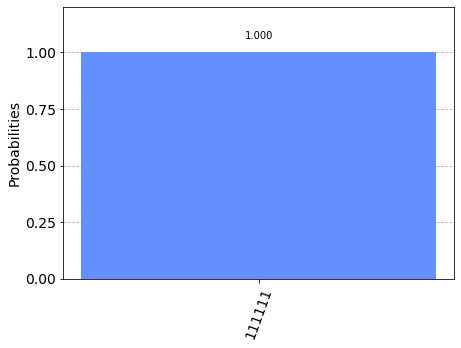

In [ ]:
# Here we run the algorithm (balanced) with no noise

backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
#noise_model = None
device = QasmSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
#noise_model = NoiseModel.from_backend(device)
#basis_gates = noise_model.basis_gates

# execute and plot the histogram
result = execute(dj_circuit, backend,
                 coupling_map=coupling_map).result()
counts = result.get_counts(0)
plot_histogram(counts)

In [ ]:
# Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, device_backend, optimization_level=3)
job = device_backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


Simulating with noise.

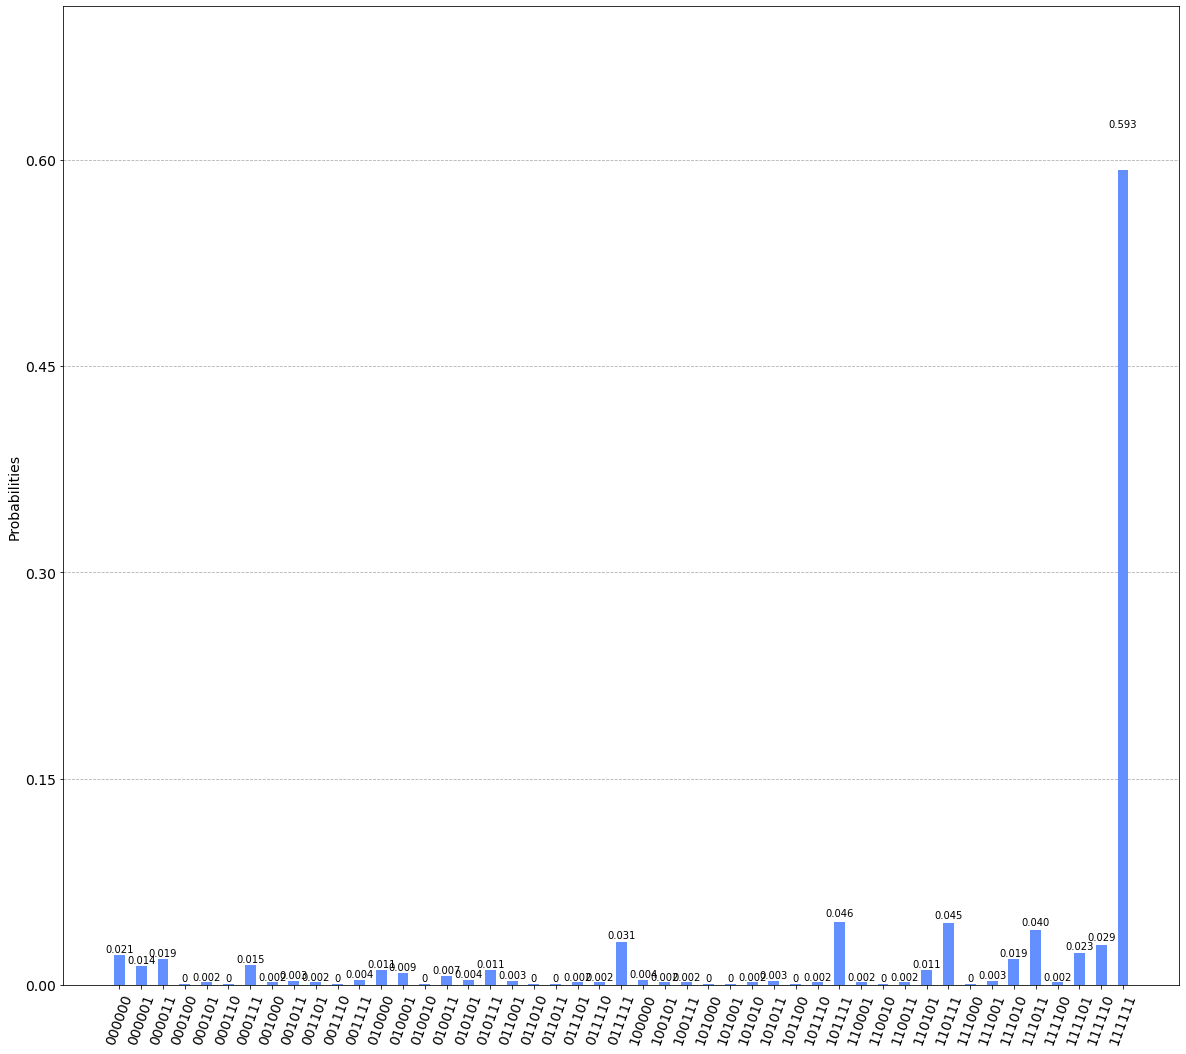

In [ ]:
# Now, let's run the algorithm (balanced) with noise that a transom qubit 
# could have

backend = Aer.get_backend('aer_simulator')
counts1 = []
values1 = []
n_shots = 1024
noise_model = None
device = QasmSimulator.from_backend(device_backend)
coupling_map = device.configuration().coupling_map
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates

result = execute(dj_circuit, backend,
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model, shots=n_shots).result()
counts = result.get_counts(0)
plot_histogram(counts, figsize=(20,18))